## Case Study on Measures of Central Tendency and Dispersion

### An Institution wishes to find out their student’s ability in maths, reading and writing skills. The Institution wants to do an exploratory study to check the following information.
### 1. Find out how many males and females participated in the test.
### 2. What do you think about the students' parental level of education?
### 3. Who scores the most on average for math, reading and writing based on:
###### ● Gender
###### ● Test preparation course
### 4. What do you think about the scoring variation for math, reading and writing based on:
###### ● Gender
###### ● Test preparation course
### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data to dataframe
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
# Columns index in dataset
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
# Datatypes in dataframe
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


### 1. Find out how many males and females participated in the test.

In [7]:
gender = df["gender"].value_counts()
print(gender)

female    518
male      482
Name: gender, dtype: int64


### Insight:
#### There are 36 Female students more than Male students.

### 2. What do you think about the students' parental level of education?

In [8]:
edu = df["parental level of education"].value_counts()
print(edu)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


### Insights:
#### 18% of parents are either graduates or post graduates.
#### 45% of parents are educated upto college level but couldn't complete graduation.
#### Remaining 37% are educated upto highschool.
#### Overall it can be concluded that all parents have basic level of education & literacy.

### 3. Who scores the most on average for math, reading and writing;

### Based on Gender:

In [9]:
gender = df.groupby('gender')['math score','reading score','writing score'].mean()
gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


### Insights:
#### The average marks for maths scored by male students are higher than female students.

#### The average marks for reading and writing scored by female students are higher than male students.
#### Female students have nearly same average scores for reading & writing tests.

### Based on Test Preparation Course:

In [10]:
prep = df.groupby('test preparation course')['math score','reading score','writing score'].mean()
prep

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


### Insights:
#### The students who completed the preparation course have a better average in all the tests.
#### Preparation course can be assumed to be very helpful in performing better in tests.

### 4. What do you think about the scoring variation for math, reading and writing;

### Based on Gender:

In [11]:
df.groupby(['gender']).agg(['var','std'])

math score            reading score            writing score  \
               var        std           var        std           var   
gender                                                                 
female  256.958593  16.029928    207.677438  14.411018    220.369327   
male    211.889097  14.556411    200.211010  14.149594    202.413924   

                   
              std  
gender             
female  14.844842  
male    14.227225

### Insights:
#### For males, in all the tests the standard deviation is more or less the same (almost equal to 14).
#### For females there is considerable deviation in maths score while comparing with writing score and reading score.
#### Hence we can say that the scores are more consistent for male students and that too without considerable dispersion.

### Based on Test preparation course:

In [12]:
df[['test preparation course', 'gender', 'math score', 'writing score',
      'reading score']].groupby(['test preparation course']).agg(['var','std'])

math score            writing score             \
                                var        std           var        std   
test preparation course                                                   
completed                210.884027  14.521847    175.202612  13.236412   
none                     246.668662  15.705689    226.251739  15.041667   

                        reading score             
                                  var        std  
test preparation course                           
completed                  183.265864  13.537572  
none                       213.419851  14.608896

### Insights:
#### Students who completed the course have lesser standard deviation in all categories.
#### Students who haven't completed the course have higher standard deviation and hence it can be said that scores are more consistent towards mean value for students who completed the course. This indicates the consistency in performing better.

### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score.
### So how will you help the management to achieve this.

In [13]:
# Sorting top 25% of Maths score of students
math_sort= df.sort_values(by=['math score'], ascending=False)
n = 25
math_sort.head(int(len(math_sort)*(n/100)))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


In [14]:
# Percentage of students scoring 77 or more in maths
tot_stud = df.shape[0]
stud_77 = df[df['math score'] >= 77].shape[0]
maths_77 = (stud_77/tot_stud)*100
print("Score in Maths >= 77 :", maths_77, "%")

Score in Maths >= 77 : 25.5 %


In [15]:
# Total no of students with Maths score 77 or more
df[(df['math score'] >=77)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


### Insights:
#### The top 25% students in Maths who are eligible for bonus points are those students who scored 77 and above.
#### There are 255 students eligible for bonus points.

### Visualization by Charts

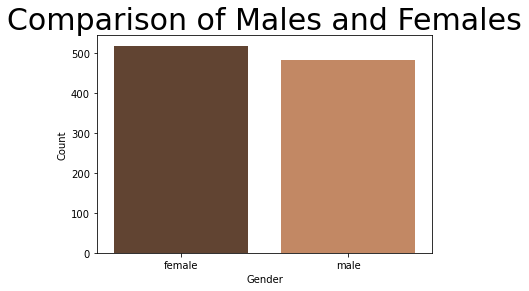

In [16]:
# visualizing the comparison of males & females
sns.countplot(df['gender'], palette = 'copper')
plt.title('Comparison of Males and Females', fontsize = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

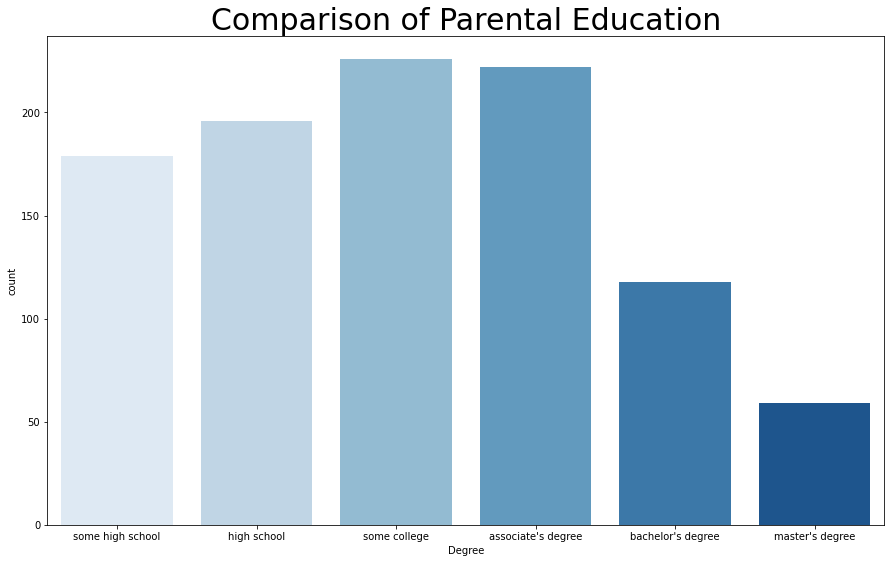

In [17]:
# visualizing the different parental education levels
plt.figure(figsize = (15, 9))
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontsize = 30)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

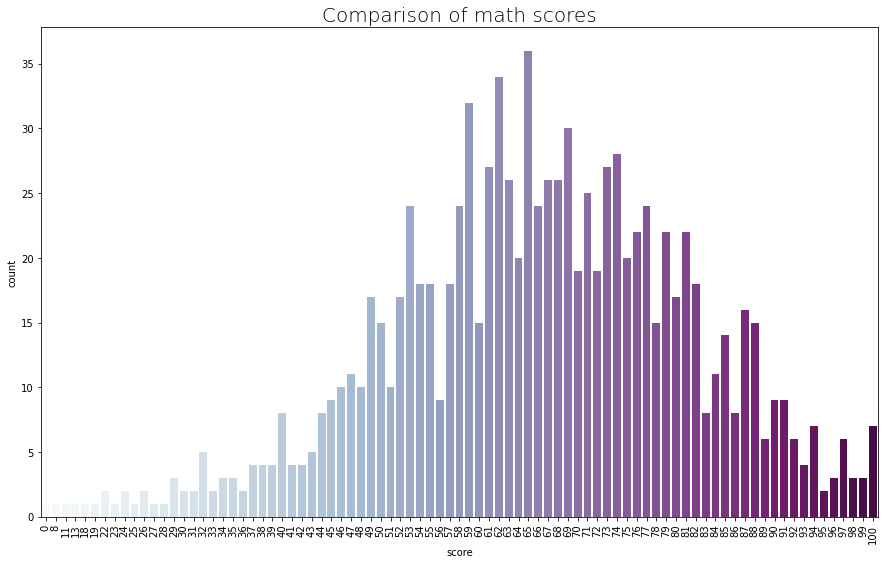

In [18]:
# visualizing maths scores
plt.figure(figsize = (15, 9))
sns.countplot(df['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

### Insights:
#### From the chart it can be concluded that 65 is the Mode value of maths score.